In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')
matplotlib_axes_logger.setLevel('ERROR')

zero_one_colormap = ListedColormap(('red', 'green'))

def plot_descision_boundary(X, y, clf):
    
    X_set, y_set = X, y
    
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1,
                                  stop = X_set[:, 0].max() + 1,
                                  step = 0.01),
                        np.arange(start = X_set[:, 1].min()-1,
                                 stop = X_set[:, 1].max()+1,
                                 step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75,
                cmap = zero_one_colormap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = (zero_one_colormap)(i), label = j)
        
        plt.title('SVM Descison Boundary')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        
        return plt.show()
    
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:,0], X[:, 1], c= y, s= 100, cmap = zero_one_colormap)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    
    return ax
    
    





In [4]:
df = pd.read_excel("SVM_Data.xlsx")

In [5]:
df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [6]:
X = df.loc[:, ["X1", "X2"]].values
y = df.loc[:, "Y"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [8]:
classifier =SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.46153846153846156

In [10]:
confusion_matrix(y_test, y_pred)

array([[0, 7],
       [0, 6]])

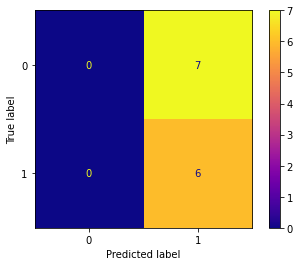

In [11]:
plot_confusion_matrix(classifier, X_test, y_test, cmap = 'plasma')